In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [2]:
start=datetime(2019,1,1)
end=datetime.today().date()
# end.date()
df=yf.download("AAPL",start,end)
df=df.reset_index().drop(["Adj Close","Date"],axis=1)

[*********************100%***********************]  1 of 1 completed


In [3]:
df
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1119 non-null   float64
 1   High    1119 non-null   float64
 2   Low     1119 non-null   float64
 3   Close   1119 non-null   float64
 4   Volume  1119 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 43.8 KB


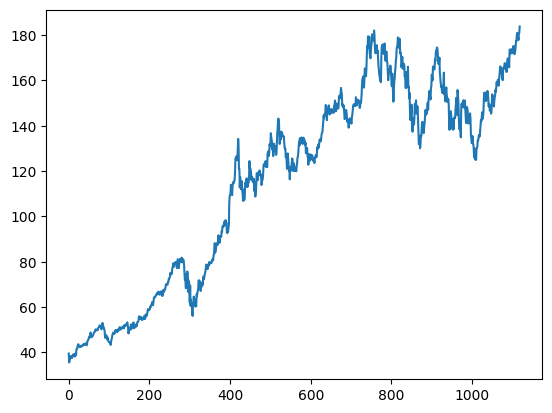

In [4]:
plt.plot(df["Close"])
df.info()

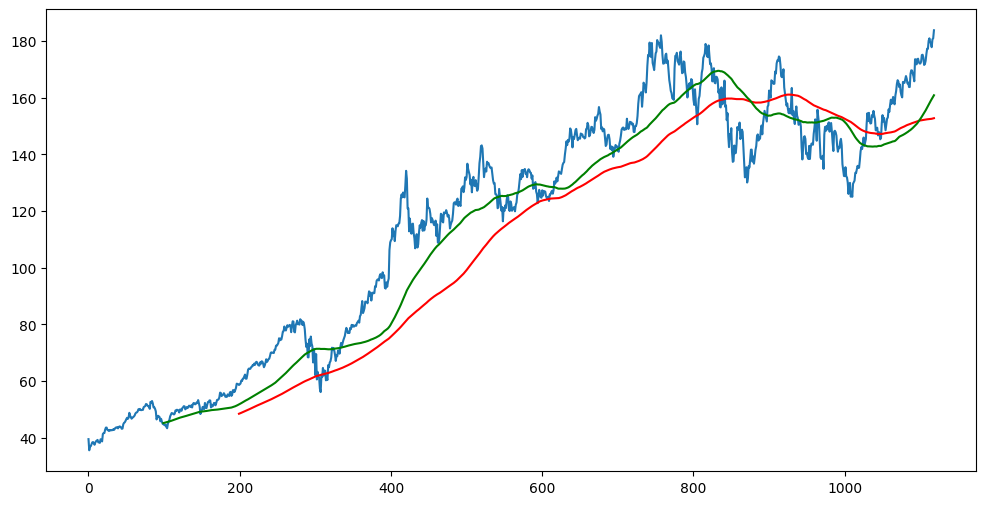

In [5]:
ma200=df.Close.rolling(200).mean()
ma100=df.Close.rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,"r")
plt.plot(ma100,"g")

In [6]:
df.shape

(1119, 5)

In [7]:
# split 70 30
i=int(len(df)*0.7)
data_training=pd.DataFrame(df.Close[0:i])
data_test=pd.DataFrame(df.Close[i:])
print(data_test.shape)
print(data_training.shape)
print(df.shape)

(336, 1)
(783, 1)
(1119, 5)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_training_array=scaler.fit_transform(data_training)
data_training_array.shape


(783, 1)

In [9]:
x_train=[]
y_train=[]
import numpy as np
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
    
my_x_train=np.array(x_train)
my_y_train=np.array(y_train)
# Y_traina

In [10]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(my_x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=56,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=50,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 56)           23968     
                                                                 
 dropout_1 (Dropout)         (None, 100, 56)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           43840     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [12]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(my_x_train,my_y_train,epochs=50)

Epoch 1/50
22/22 [==============================] - 10s 191ms/step - loss: 0.1605
Epoch 2/50
22/22 [==============================] - 4s 181ms/step - loss: 0.0501
Epoch 3/50
22/22 [==============================] - 4s 184ms/step - loss: 0.0247
Epoch 4/50
22/22 [==============================] - 4s 185ms/step - loss: 0.0254
Epoch 5/50
22/22 [==============================] - 4s 182ms/step - loss: 0.0240
Epoch 6/50
22/22 [==============================] - 4s 184ms/step - loss: 0.0200
Epoch 7/50
22/22 [==============================] - 4s 181ms/step - loss: 0.0202
Epoch 8/50
22/22 [==============================] - 4s 186ms/step - loss: 0.0177
Epoch 9/50
22/22 [==============================] - 4s 184ms/step - loss: 0.0201
Epoch 10/50
22/22 [==============================] - 4s 187ms/step - loss: 0.0166
Epoch 11/50
22/22 [==============================] - 4s 184ms/step - loss: 0.0191
Epoch 12/50
22/22 [==============================] - 4s 182ms/step - loss: 0.0155
Epoch 13/50
22/22 [=====

In [13]:
model.save('keras_model.h5')

In [14]:
data_test.tail()

,Close
1114,179.210007
1115,177.820007
1116,180.570007
1117,180.960007
1118,183.789993


In [15]:
past_100=data_training.tail(100)
final_df=past_100.append(data_test,ignore_index=True)
# final_df

D:\Temp\ipykernel_16064\4017944533.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100.append(data_test,ignore_index=True)


In [16]:
final_df.head()

,Close
0,146.059998
1,142.940002
2,143.429993
3,145.850006
4,146.830002


In [17]:
input_data=scaler.fit_transform(final_df)
input_data.shape

(436, 1)

In [18]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
# x_test.shape
#     X_train.append(data_training_array[i-100:i])
    # Y_train.append(data_training_array[i:0])
    

x_test=np.array(x_test)
y_test=np.array(y_test)
# x_test = x_test.astype(np.float64)
# y_test = y_test.astype(np.float64)
# print(x_test[1])

In [19]:
print(y_test[1])
# print(x_test[1])
print(x_test)

0.8014293204775584
[[[0.35800582]
  [0.30491759]
  [0.31325501]
  ...
  [0.80602357]
  [0.79360234]
  [0.8475414 ]]

 [[0.30491759]
  [0.31325501]
  [0.35443271]
  ...
  [0.79360234]
  [0.8475414 ]
  [0.8722138 ]]

 [[0.31325501]
  [0.35443271]
  [0.37110782]
  ...
  [0.8475414 ]
  [0.8722138 ]
  [0.80142932]]

 ...

 [[0.16573079]
  [0.1858092 ]
  [0.17338796]
  ...
  [0.92836495]
  [0.92206931]
  [0.89841779]]

 [[0.1858092 ]
  [0.17338796]
  [0.17440885]
  ...
  [0.92206931]
  [0.89841779]
  [0.94521038]]

 [[0.17338796]
  [0.17440885]
  [0.21864896]
  ...
  [0.89841779]
  [0.94521038]
  [0.95184641]]]


In [20]:
y_predict=model.predict(x_test)
y_predict.shape


11/11 [==============================] - 2s 77ms/step


(336, 1)

In [21]:
y_predict

array([[0.782112  ],
       [0.78453624],
       [0.7882868 ],
       [0.79269767],
       [0.79715717],
       [0.8014139 ],
       [0.80536664],
       [0.80878925],
       [0.8114046 ],
       [0.8128501 ],
       [0.8126639 ],
       [0.8106903 ],
       [0.80708325],
       [0.8021649 ],
       [0.79621553],
       [0.7896837 ],
       [0.78298926],
       [0.7763158 ],
       [0.7695528 ],
       [0.76246035],
       [0.755128  ],
       [0.74753296],
       [0.73948586],
       [0.73065716],
       [0.7210259 ],
       [0.710935  ],
       [0.700868  ],
       [0.6914535 ],
       [0.683288  ],
       [0.6769701 ],
       [0.67296636],
       [0.6716807 ],
       [0.67331517],
       [0.67787933],
       [0.6853391 ],
       [0.6954553 ],
       [0.7076669 ],
       [0.72129256],
       [0.7358682 ],
       [0.7508418 ],
       [0.7655157 ],
       [0.77929544],
       [0.79163027],
       [0.8019097 ],
       [0.80983937],
       [0.81550956],
       [0.81891835],
       [0.820

In [22]:
scaler.scale_
# y_test.shape

array([0.01701549])

In [23]:
scale_factor=1 / 0.01754694
y_predict=scale_factor*y_predict
y_test=scale_factor* y_test

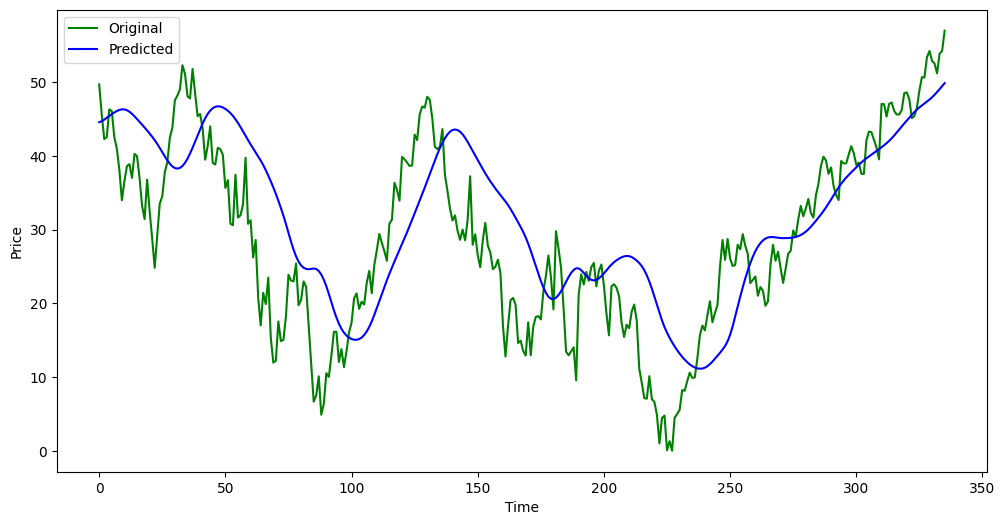

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test,"g",label="Original")
plt.plot(y_predict,"b",label="Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [25]:
y_predict

array([[44.57256 ],
       [44.710716],
       [44.92446 ],
       [45.175835],
       [45.42998 ],
       [45.672573],
       [45.89784 ],
       [46.092896],
       [46.241943],
       [46.32432 ],
       [46.313713],
       [46.201233],
       [45.99567 ],
       [45.715374],
       [45.37632 ],
       [45.00407 ],
       [44.622555],
       [44.242233],
       [43.85681 ],
       [43.45261 ],
       [43.03474 ],
       [42.6019  ],
       [42.143295],
       [41.64015 ],
       [41.09126 ],
       [40.516182],
       [39.942463],
       [39.405933],
       [38.94058 ],
       [38.580524],
       [38.35235 ],
       [38.27908 ],
       [38.372227],
       [38.63234 ],
       [39.057472],
       [39.633995],
       [40.32993 ],
       [41.106457],
       [41.937126],
       [42.79047 ],
       [43.626736],
       [44.412045],
       [45.115005],
       [45.70083 ],
       [46.15274 ],
       [46.475883],
       [46.67015 ],
       [46.739563],
       [46.700867],
       [46.57515 ],


1/1 [==============================] - 0s 48ms/step


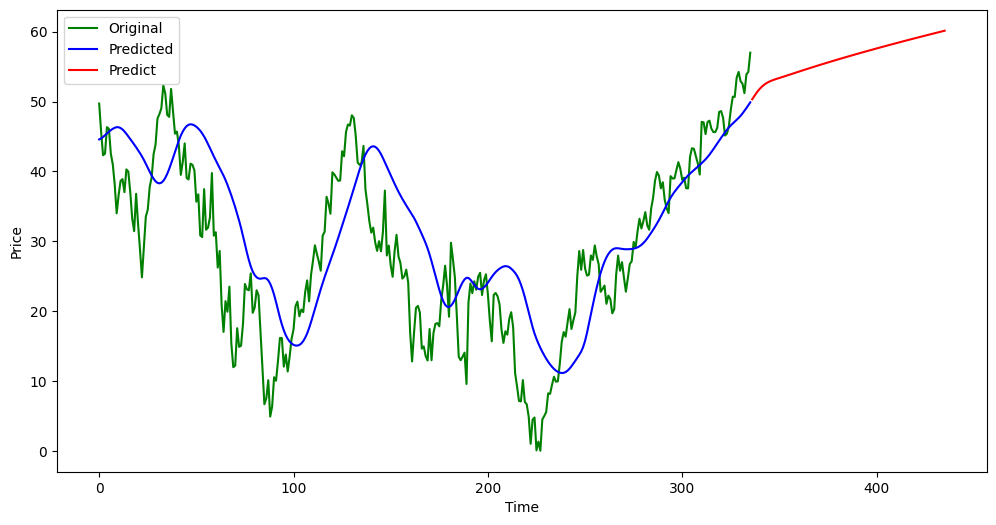

In [29]:

past_100 = final_df.tail(100)
input_data = scaler.transform(past_100)
future_predictions = []
for i in range(100):
    x_input = input_data[-100:].reshape((1, 100, 1))
    y_pred = model.predict(x_input)
    future_predictions.append(y_pred[0, 0])
    input_data = np.append(input_data, y_pred)
    input_data = np.delete(input_data, 0)
future_predictions = np.array(future_predictions)
future_predictions = future_predictions * scale_factor

plt.figure(figsize=(12,6))
plt.plot(y_test,"g",label="Original")
plt.plot(y_predict,"b",label="Predicted")
plt.plot(range(len(y_test), len(y_test) + len(future_predictions)), future_predictions, "r", label="Predict")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()